# 模型正则化

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3., 3., size=100)
X = x.reshape(-1, 1)
y = 0.5*x + 3 + np.random.normal(0, 1, 100)


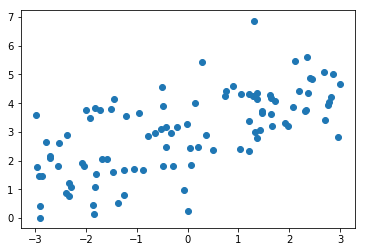

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
ploy_reg = PolynomialRegression(degree=20)

In [7]:
ploy_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [8]:
y_ploy_predict = ploy_reg.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
mean_squared_error(y_test, y_ploy_predict)

1.6084630232674066

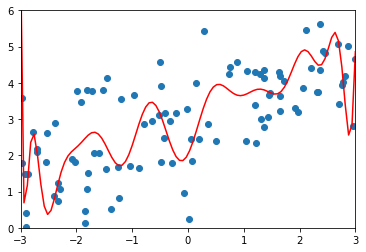

In [11]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = ploy_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

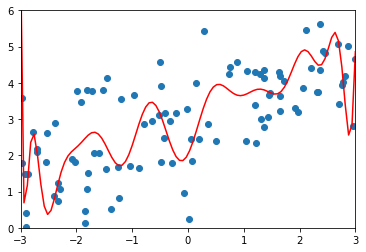

In [12]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(ploy_reg)

- 使用岭回归

In [13]:
from sklearn.linear_model import Ridge

In [14]:
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [15]:
ridge1_reg = RidgeRegression(20, 0.0001)

In [16]:
ridge1_reg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge_reg', Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [17]:
y1_predict = ridge1_reg.predict(X_test)

In [18]:
mean_squared_error(y_test, y1_predict)

0.915543825755083

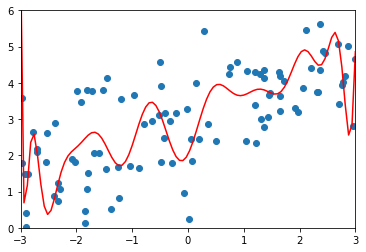

In [19]:
plot_model(ploy_reg)